# K-Nearest Neighbours for Red Wine Classification

## 1. Import required module and dataset

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics

%matplotlib inline

In [63]:
url_red = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_wh = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [64]:
data = pd.read_csv(url_red, delimiter= ';')
red = data

In [65]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb50e3cfe50>,
      dtype=object)

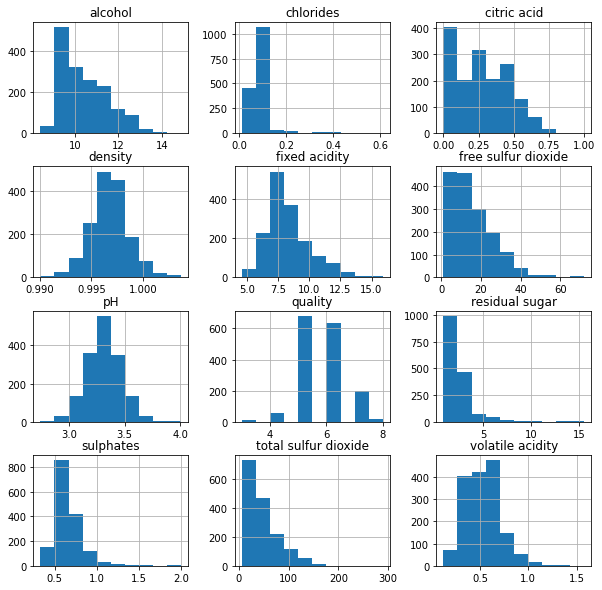

In [66]:
red.hist(figsize=(10, 10), layout=(4, 3))

## 2. Preprocessing

### 2-1. Missing values Check 

In [67]:
red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [68]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 2-2. Create new column to re-label

In [69]:
red.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [70]:
# quality values mapping
# 3, 4, 5 are equal to 0 and 6, 7, 8  are equal to 1
# 1 for good quality and 0 for not good quality
red['good_wine'] = red.quality.map({3:0, 4:0, 5:0, 6:1, 7:1, 8:1}) 

In [71]:
red.sample(n = 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine
772,9.5,0.570,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4,5,0
286,12.0,0.450,0.55,2.0,0.073,25.0,49.0,0.99970,3.10,0.76,10.3,6,1
1328,6.5,0.520,0.11,1.8,0.073,13.0,38.0,0.99550,3.34,0.52,9.3,5,0
487,10.2,0.645,0.36,1.8,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6,1
699,11.8,0.380,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.8,6,1
1563,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,0
1111,5.4,0.420,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7,1
592,9.0,0.450,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.7,5,0
1575,7.5,0.520,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.8,6,1
478,9.6,0.680,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2,5,0


In [72]:
#Good wine value distribution
red.good_wine.value_counts()

1    855
0    744
Name: good_wine, dtype: int64

### 2-3. Split data into train and test set

In [73]:
X = red.drop(['quality','good_wine'], axis = 1)
y = red['good_wine']

In [74]:
#Train(50%), Test(50%) dataset split by shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 123, shuffle = True)

### 2-4. Normalise the data according to the Z-score transform

In [75]:
#Independent Variables Standarsation
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

## 3. Parameter selection for KNN model

### 3-1. Train the KNN classifiers for number of neighbors = 1, 6.., 500 through K-Fold Cross-validation(K = 5)

In [76]:
neighbors = list(np.arange(1, 500, 5))
param_grid = {'n_neighbors':neighbors}

knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
grid_result = grid.fit(X_train_norm, y_train)

In [77]:
print("Highest Accuracy: %f with the %d of neighbors\n" %(grid_result.best_score_, grid_result.best_params_['n_neighbors']))
for param, name, score in grid.cv_results_:
    print("Accuracy: %f\tstd: %f\tusing %r" %(score.mean(), score.std(), param))

Highest Accuracy: 0.757217 with the 51 of neighbors



ValueError: too many values to unpack (expected 3)

In [78]:
result = pd.DataFrame(columns=('accuracy', 'num_of_neighbors'))

In [84]:
for params in grid_result.cv_results_:
    print(params)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [81]:
for params, name, score in grid_result.cv_results_['mean_test_score']:
    result.loc[len(result)] = [score.mean(), param['n_neighbors']]

TypeError: cannot unpack non-iterable numpy.float64 object

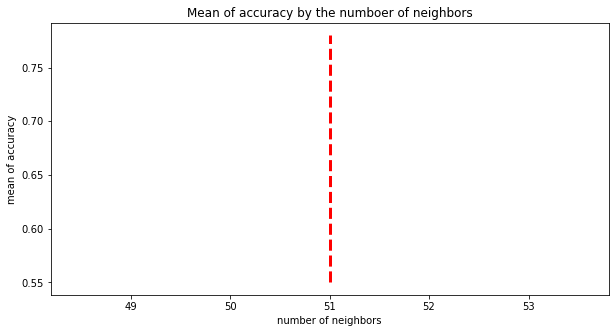

In [80]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.scatter(result['num_of_neighbors'], result['accuracy'])
plt.plot([51, 51], [0.55, 0.78],  color = 'red', linewidth=3, linestyle = '--')
plt.xlabel('number of neighbors')
plt.ylabel('mean of accuracy')
plt.title('Mean of accuracy by the number of neighbors')
plt.show()

### 3-2. Best Model Selection (k = 51)

In [152]:
best_knn = grid_result.best_estimator_
best_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=51, p=2,
           weights='uniform')

In [153]:
y_pred = best_knn.predict(X_test_norm)

### Confusion Matrix

In [154]:
cm = confusion_matrix(y_test, y_pred) # should use y_pred as 1st parameter and y_test 2nd, please double check
print('Confusion Matrix \n   TP  TN\n', cm,'\n   FP  FN')
sensitivity = (254/(254+88))*100
specificity = (325/(133+325))*100
print("Sensitivity: %.1f%%\nSpecificity: %.1f%%" %(sensitivity, specificity))
print("Accuracy   : %.1f%%" %(best_knn.score(X_test_norm, y_test)*100))
print("Gerneralisation Error : %.1f%%" %((1-best_knn.score(X_test_norm, y_test))*100))

Confusion Matrix 
   TP  TN
 [[254  88]
 [133 325]] 
   FP  FN
Sensitivity: 74.3%
Specificity: 71.0%
Accuracy   : 72.4%
Gerneralisation Error : 27.6%


## How do you judge whether the classifier is well-suited for the data set?
 - •	Before applying the K-Nearest Neighbours ML technique, we checked the dataset for missing values, categorical values, and rare “classes of interest” (by looking at the output distribution), which would have required a strategic oversampling technique. Fortunately, the dataset was clean and well distributed, and so we only had to normalise the training dataset in the pre-processing phase. The best training model with k = 51 neighbours was built through 5-Fold cross-validation. This technique reduces the variance of the misclassification rate. Using cross-validation, our best accuracy was 75.7% with a test accuracy using the trained model of 72.4%. The accuracy difference is a mere 3.3% as the trained classifier has low variance. On top of that, we also found that the sensitivity (74.3%) and specificity (71.0%) were very close to the accuracy (72.4%) on the test dataset, which indicates that final classifier is unbiased. However, regarding the accuracy itself, it is hard to judge whether the final model with k = 51 is well-suited to classify the quality of a bottle of wine. If a wine manufacturer uses this classifier to check if the product meets specifications, about 27 bottles out of every 100 will be misclassified. Therefore, the final classifier has low variance but high bias for the data set. 